In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

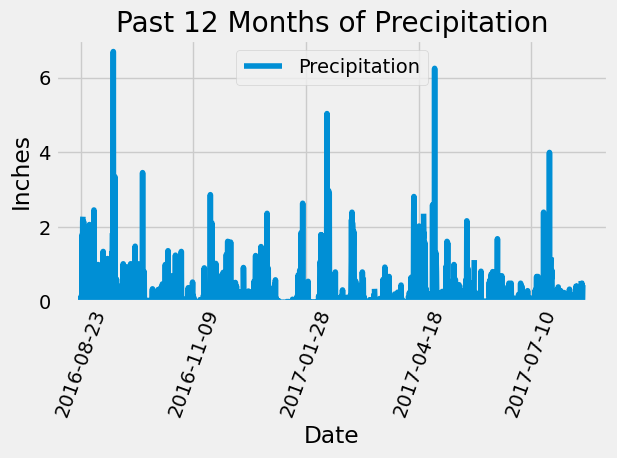

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date
# Perform a query to retrieve the data and precipitation scores
past_year_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').order_by(Measurement.date).all()
past_year_precip

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(past_year_precip)
precip_df.columns = ['Date', 'Precipitation']
precip_df

# Sort the dataframe by date
clean_precip_df = precip_df.set_index("Date")
clean_precip_df

# Use Pandas Plotting with Matplotlib to plot the data
clean_precip_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=70)
plt.title('Past 12 Months of Precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
clean_precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    order_by(func.count(Measurement.station).desc()).\
    group_by(Measurement.station).all() 

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Find most active station from list (would be 1st in descending list - therefore index 0)
most_active_station = most_active_stations[0]

# Isolate station number from list (another index 0)
station_number = most_active_station[0]

high_temp = session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==station_number).all()

low_temp = session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==station_number).all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
  filter(Measurement.station==station_number).all()

print(high_temp, low_temp, avg_temp)

[(85.0,)] [(54.0,)] [(71.66378066378067,)]


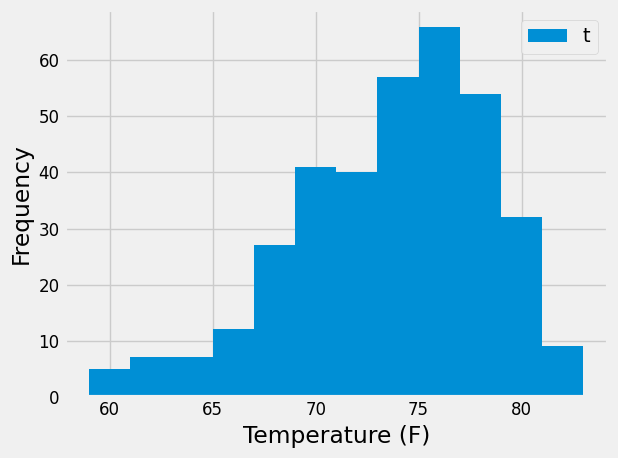

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find most recent date, then query previous 12 months
most_recent_date = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == station_number).\
    order_by(Measurement.date.desc()).first()
most_recent_date

# 2017-08-18
previous_year_temps = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == station_number).\
    filter(Measurement.date > '2016-08-17').all()
previous_year_temps

# Create a dataframe
previous_year_temps_df = pd.DataFrame(previous_year_temps)["tobs"]
previous_year_temps_df

# Plot histogram with 1 bin per month
hist = previous_year_temps_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,69)
plt.legend('tobs')
plt.tight_layout()
plt.show()


# Close Session

In [52]:
# Close Session
session.close()